## Business Grouping

In [2]:
import pandas as pd

# read the entire file into a python array
with open('yelp_dataset/yelp_academic_dataset_business.json', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df = pd.read_json(data_json_str)
df.shape

(209393, 14)

In [3]:
df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,10913 Bailey Rd,"{u'BusinessParking': u'{'garage': False, 'stre...",f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,"{u'Monday': u'10:0-18:0', u'Tuesday': u'11:0-2...",1,35.462724,-80.852612,The Range At Lake Norman,28031,36,3.5,NC
1,"8880 E Via Linda, Ste 107","{u'GoodForKids': u'True', u'ByAppointmentOnly'...",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,None,1,33.569404,-111.890264,"Carlos Santo, NMD",85258,4,5.0,AZ
2,3554 Rue Notre-Dame O,None,XNoUzKckATkOD1hP6vghZg,"Pets, Pet Services, Pet Groomers",Montreal,None,1,45.479984,-73.580070,Felinus,H4C 1P4,5,5.0,QC
3,1015 Sharp Cir,"{u'DogsAllowed': u'True', u'BusinessParking': ...",6OAZjbxqM5ol29BuHsil3w,"Hardware Stores, Home Services, Building Suppl...",North Las Vegas,"{u'Friday': u'7:0-16:0', u'Tuesday': u'7:0-16:...",0,36.219728,-115.127725,Nevada House of Hose,89030,3,2.5,NV
4,4827 E Downing Cir,"{u'BusinessAcceptsCreditCards': u'True', u'ByA...",51M2Kk903DFYI6gnB5I6SQ,"Home Services, Plumbing, Electricians, Handyma...",Mesa,"{u'Friday': u'9:0-16:0', u'Tuesday': u'9:0-16:...",1,33.428065,-111.726648,USE MY GUY SERVICES LLC,85205,26,4.5,AZ


### Top Rated

In [4]:
df_las_vegas = df.loc[df['city'] == "Las Vegas"]
df_las_vegas.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
6,"6870 S Rainbow Blvd, Ste 117","{u'BusinessAcceptsCreditCards': u'True', u'Res...",oiAlXZPIFm2nBCt0DHLu_Q,"Dry Cleaning & Laundry, Local Services, Laundr...",Las Vegas,"{u'Monday': u'7:0-19:0', u'Tuesday': u'7:0-19:...",1,36.063977,-115.241463,Green World Cleaners,89118,81,3.5,NV
16,3131 Las Vegas Blvd,"{u'BusinessAcceptsCreditCards': u'True', u'Res...",uZuh51lXu7tsrC8RAwkg1A,"Shopping, Shoe Stores, Fashion",Las Vegas,None,0,36.125732,-115.167608,Manolo Blahnik,89109,32,4.5,NV
36,9595 W Tropicana Ave,"{u'Alcohol': u'u'none'', u'Caters': u'False', ...",fnZrZlqW1Z8iWgTVDfv_MA,"Mexican, Restaurants, Fast Food",Las Vegas,None,0,36.099738,-115.301568,Carl's Jr,89147,15,2.5,NV
42,6530 S Decatur Blvd,"{u'BusinessParking': u'{'garage': False, 'stre...",fhNf_sg-XzZ3e7HEVGuOZg,"Burgers, Restaurants, American (Traditional), ...",Las Vegas,"{u'Monday': u'11:0-22:0', u'Tuesday': u'11:0-2...",0,36.071196,-115.207463,Meat Chix And Wieners,89118,10,3.0,NV
51,"101 S Rainbow Blvd, Ste 23, Darby's Hairitage","{u'BusinessAcceptsCreditCards': u'False', u'Re...",5XMKDYmMGSKkCkrYoELxzg,"Hair Stylists, Hair Salons, Beauty & Spas",Las Vegas,None,1,36.172534,-115.244762,Annette Thomas Hair Colorist Specialist,89107,7,5.0,NV


In [13]:
c = []
for el in df_las_vegas['categories']:
    for cat in str(el).split(', '):
        if cat not in c:
            c.append(cat)
            
categories = {}
for cat in c:
    categories[cat] = []

for el in df_las_vegas.to_dict('records'):
    if el['categories'] != None:
        for cat in el['categories'].split(', '):
            categories[cat].append(el['name'])
            
categories_counts = [{'cat': cat, 'count': len(categories[cat])} for cat in categories]
categories_counts = sorted(categories_counts, key=lambda x: x['count'], reverse=True)
categories_counts[:10]

[{'cat': 'Restaurants', 'count': 6931},
 {'cat': 'Shopping', 'count': 5504},
 {'cat': 'Home Services', 'count': 4227},
 {'cat': 'Food', 'count': 3930},
 {'cat': 'Health & Medical', 'count': 3487},
 {'cat': 'Beauty & Spas', 'count': 3328},
 {'cat': 'Local Services', 'count': 2808},
 {'cat': 'Automotive', 'count': 2351},
 {'cat': 'Nightlife', 'count': 2264},
 {'cat': 'Event Planning & Services', 'count': 2004}]

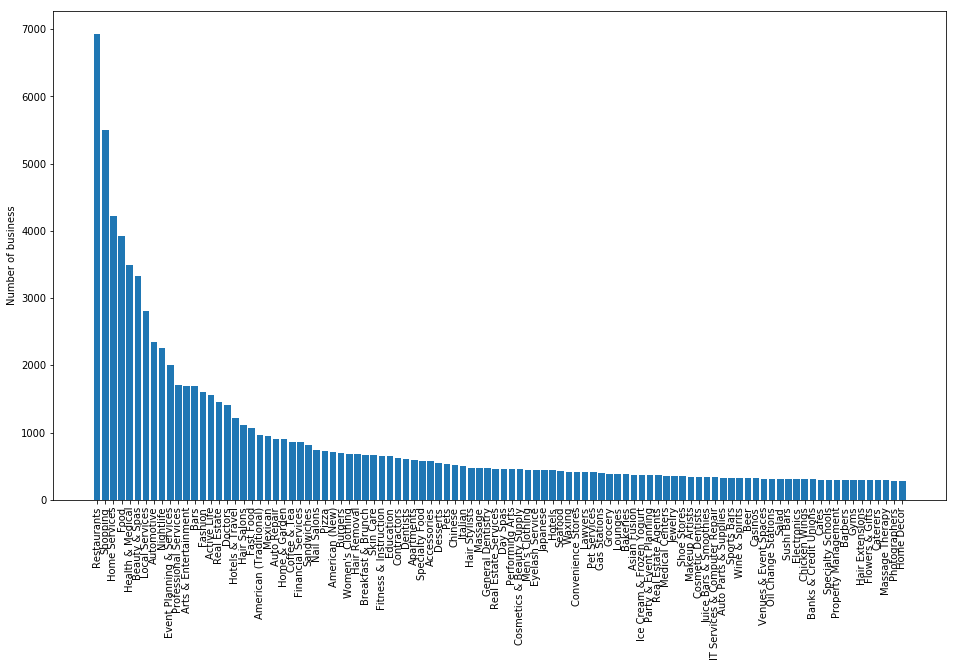

In [111]:
import matplotlib.pyplot as plt

n_cat = 50

fig, ax = plt.subplots(figsize=(16, 9))
x = [el['cat'] for el in categories_counts]
y = [el['count'] for el in categories_counts]
plt.bar(x[:n_cat], y[:n_cat])
ax.set_ylabel('Number of business')
plt.xticks(rotation='vertical')
plt.show()

In [112]:
def overlap(cat1, cat2):
    res = 0
    for el1 in cat1:
        if el1 in cat2:
            res = res + 1
    return res

In [113]:
corr_matrix = [[] for i in range(len(list(categories)[:n_cat]))]

for i in range(len(list(categories)[:n_cat])):
    for j in range(len(list(categories)[:n_cat])):
        index_i = list(categories)[i]
        index_j = list(categories)[j]
        overlap_val = overlap(categories[index_i], categories[index_j])
        total = len(categories[index_i]) + len(categories[index_j]) - overlap_val
        corr_matrix[i].append(float(overlap_val)/float(total))

In [114]:
df_corr_matrix = pd.DataFrame(corr_matrix, columns=list(categories)[:n_cat])
df_corr_matrix.head()

,Masonry/Concrete,Trains,Anesthesiologists,Kids Activities,Truck Rental,Drugstores,Dry Cleaning & Laundry,Well Drilling,Furniture Rental,Pawn Shops,...,Shopping Centers,Land Surveying,Free Diving,Mountain Biking,Adoption Services,Pick Your Own Farms,Pop-Up Restaurants,Firearm Training,Nail Salons,Photo Booth Rentals
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


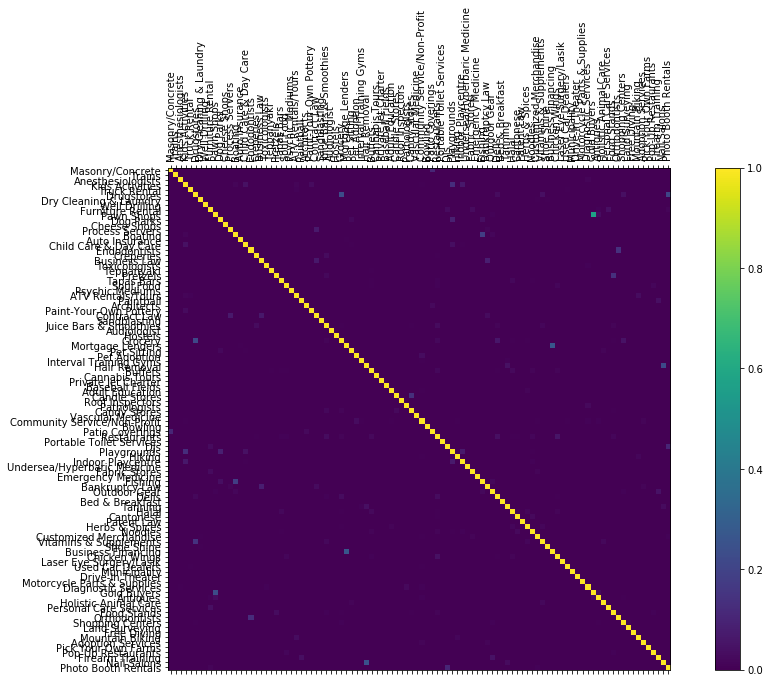

In [117]:
f = plt.figure(figsize=(16, 9))
plt.matshow(df_corr_matrix, fignum=f.number)
plt.xticks(range(df_corr_matrix.shape[1]), df_corr_matrix.columns, rotation=90)
plt.yticks(range(df_corr_matrix.shape[1]), df_corr_matrix.columns)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)